In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Reading Dataframe**

In [3]:
url="https://raw.githubusercontent.com/manishbhnau/Repo/master/Credit.csv"
df=pd.read_csv(url)
print (df.head(3))

   Unnamed: 0   Income  Limit  Rating  ...  Married  Ethnicity  Balance Defaultee
0           1   14.891   3606     283  ...      Yes  Caucasian      333         0
1           2  106.025   6645     483  ...      Yes      Asian      903         0
2           3  104.593   7075     514  ...       No      Asian      580         0

[3 rows x 13 columns]


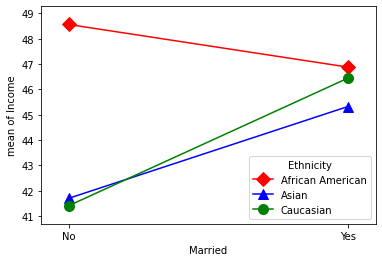

In [4]:
fig = interaction_plot(df.Married, df.Ethnicity, df.Income, colors=['red','blue', 'green'], markers=['D','^', "o"], ms=10)

# **statsmodel**

In [10]:
formula = 'Income ~ C(Ethnicity) + C(Married):C(Married)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
print (aov_table)

                     sum_sq     df         F    PR(>F)
C(Ethnicity)     979.846183    2.0  0.392723  0.675479
C(Married)       804.057725    1.0  0.644533  0.422556
Residual      494011.531666  396.0       NaN       NaN


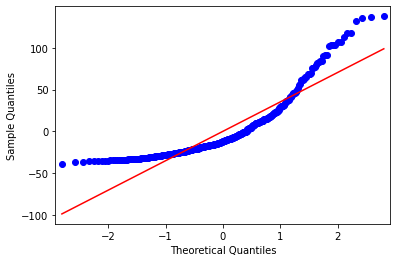

In [6]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

# **pingouin**

In [7]:
!pip install pingouin

     |████████████████████████████████| 225kB 5.2MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.6-cp36-none-any.whl size=217880 sha256=82842c498f121063a779a30ac85bfc2913d8b96a22f02d5c55a02f59ebad94d1
  Stored in directory: /root/.cache/pip/wheels/0f/12/3e/c50f18f38eaf437b927b567ac6615215fdf75fe58890d32276
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4962 sha256=789508bca044afdde437907037fff1c02bd3ae08687fb77777a4362bfa046e02
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7049 sha256=09613a0a7053ac29045224193c05bac71031a2d369e452b2a7978122514df93d
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [8]:
import pingouin as pg
df.head(3)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [9]:
aov = pg.anova(dv='Income', between=['Ethnicity', 'Married'], data=df, detailed=True)
print(aov)

                Source             SS     DF  ...         F     p-unc       np2
0            Ethnicity     979.846183    2.0  ...  0.391328  0.676421  0.001982
1              Married     804.057725    1.0  ...  0.642244  0.423382  0.001627
2  Ethnicity * Married     743.046926    2.0  ...  0.296756  0.743392  0.001504
3             Residual  493268.484740  394.0  ...       NaN       NaN       NaN

[4 rows x 7 columns]
